![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Algoritmo de Clasificación I

## (MNIST)

El conjunto de datos **MNIST** contiene 70,000 imágenes pequeñas de dígitos escritos a mano. El conjunto consiste en imágenes en escala de grises de dígitos escritos a mano (números del 0 al 9). Cada imagen tiene una resolución de 28 * 28 píxeles.

![mnist](https://production-media.paperswithcode.com/datasets/MNIST-0000000001-2e09631a_09liOmx.jpg)

In [1]:
# importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Clasificador Binario

In [2]:
# cargamos el conjunto de datos MNIST
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
x = mnist['data']
y = mnist['target']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape

(70000,)

Cada imagen tiene 784 características. Cada imagen tiene las dimensiones de `28 * 28` pixéles, cada características representa un pixel, desde 0 (blanco) a 255 (negro).

In [8]:
28 * 28

784

En Scikit-learn, el conjunto de datos MNIST es cargado como un objeto de tipo `Bunch`, que es un contenedor similar a un diccionario que contiene varios elementos, incluyendo los datos y las etiquetas.

`x.to_numpy()` convierte el objeto `X` a un arreglo NumPy.

In [46]:
numero = x.to_numpy()[0]

In [47]:
numero_imagen = numero.reshape(28, 28)

In [ ]:
numero_imagen

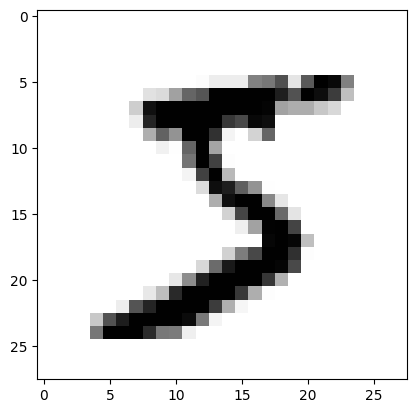

In [48]:
plt.imshow(numero_imagen, cmap='binary')
plt.show()

In [19]:
y[1]

'0'

In [20]:
y = y.astype(np.uint8)

In [21]:
y[0]

np.uint8(5)

Debemos de crear el conjunto de entrenamiento y testing. El conjunto MNIST ya esta separado, siendo las primeras 60,000 imágenes para el conjunto de entrenamiento y las restantes 10,000 para el conjunto de testing. Gracias a que el conjunto ya se encuentra listo para ser utilizado podemos estar seguros de que la validación `cross-validation` serán similares, por lo que tendremos un resultado que nos garantice un correcto resultado.

In [22]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

#### Entrenamiento del Clasificador Binario

Este problema se encargará sólamente de detectar el número 5, por lo que filtraremos el conjunto para obtener solamente las imágenes que dibujan el número 5.

In [23]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [24]:
y_train_5[:5]

,class
0,True
1,False
2,False
3,False
4,False


### SGDClassifier

Para comenzar utilizaremos el clasificador SGDClassifier (*Stochastic Gradient Descent*). Este clasificador funciona muy bien con largos conjuntos de datos, esto se debe a que toma cada instancia de entrenamiento de forma independiente, uno a la vez.

Este clasificador pertenecer a la familia de clasificadores lineales.

Algunas situaciones comunes para su implementación son:

- **Grandes conjuntos de datos**: Debido a su capacidad para trabajar con lotes pequeños de datos a la vez, este clasificador es eficiente para conjuntos de datos grandes que no caben en la memoria.
- **Problemas de clasificación binaria o multiclase**.

El SGDClassifier utiliza el método de Descenso de Gradiente Estocástico para optimizar una función de pérdida en lugar de utilizar el conjunto completo de datos en cada iteración. El descenso de gradiente estocástico es una técnica que actualiza los parámetros del modelo de forma iterativa, utilizando solo un pequeño lote de datos (minilote) en cada paso.

#### Ventajas y desventajas

**Ventajas**

1. **Eficiencia en grandes conjuntos de datos**
2. **Adaptabilidad**: Es adaptable y puede ser utilizado para problemas de clasificación lineal variados.

**Desventajas**

1. **Sensibilidad a la escala**: Puede ser sensible a la escala de las características, por lo que la normalización de las características puede ser necesaria.
2. **Necesidad de ajuste de hiperparámetros**: Requiere ajuste de hiperparámetros, para obtener un rendimiento óptimo.

In [25]:
from sklearn.linear_model import SGDClassifier

In [28]:
sgd_classifier = SGDClassifier(random_state=42)

In [36]:
sgd_classifier.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [49]:
sgd_classifier.predict([numero])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Medir el rendimiento


##### Cross-Validation

Utilizaremos `cross_val_score()` para evaluar `SGDClassifier` utilizando validación cruzada de K-fold con tres pliegues. `K-fold cross-validation` significa dividir el conjunto de entrenamiento en `K` pliegues (en este caso 3).

In [50]:
# importamos las librerias
from sklearn.model_selection import cross_val_score

In [51]:
cross_val_score(sgd_classifier, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

son tres resultados ya que se separo al conjunto en 3.... un 95 en la primera un 96 en la segunda.. podemos decir que es bastante bueno

podemos sacar el promedio de las 3

Hay mas formas de calificarlos......

vamos a ver la matriz de confusion.....

#### Matriz de Confusión

|||
|--|--|
|TN|FP|
|FN|TP|

TN: predice negativo y es negatico <br>
FP: Predice positivo cuando en realidad es negativo <br>
FN: Predice negativo cuando en realidad es positivo <br>
TP:  predice positivo y es positivo <br>

La idea general de la matriz de confusión es contar el número de veces que la instancia de clase A son clasificados como clase B. `cross_val_predict()` retorna la predicción realizada en cada división hecha.

In [52]:
# importamos igual que la anterior pero predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [53]:
y_train_pred = cross_val_predict(sgd_classifier, x_train, y_train_5, cv=3)

In [54]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

|||
|--|--|
|TN|FP|
|FN|TP|

- *53,892* TN: imágenes fueron correctamente clasificadas como no 5
- *687*    FP: fueron erroneamente clasificadas como 5
- *1,891*  FN: fueron erroneamente clasificadas como no 5
- *3,530*  TP: fueron correctamente clasificados como 5

Otras métricas más concisas de los algoritmos de clasificación son la métrica de *precision* y *recall (memoria)*.

$$
precision = \frac{TP}{TP + FP}
$$

*TP* es el número de verdaderos positivos, y *FP* es el número de falsos positivos.

$$
recall = \frac{TP}{TP+FN}
$$

*FN* es el número de falsos positivos.

#### *Precision* y *Recall*

In [55]:
from sklearn.metrics import precision_score, recall_score

In [56]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [57]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

El modelo cada vez que detecta un número 5 acierta un *83.71%*. <br> Además, solo deteca un *65.12%* de los números 5. Cantidad de 5 que es capaz de detectar

Solo podemos mejorar una.... si una sube la otra baja

Existe una métrica que combina los valores de *precision* y *recall* llamada *F1 score*. La métrica *F1 score* es el promedio armonico (*harmonic mean*) de *precision* y *recall*. Mientras el promedio regular trata todos los valores de la misma manera, el promedio armónico da más peso a los valores pequeños. Como resultado, el clasificador obtiene un valor alto de *F1* si *precision* y *recall* son altos.

$$
F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [59]:
from sklearn.metrics import f1_score

In [60]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847